In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from math import sqrt,cos,acos,pi,exp,sin,atan2,log
from numpy import arange,mean,asarray,isnan,isinf
import pickle
from scipy import stats

import csv
import sys
import pandas as pd
import os

fset = 0 # 0 = open data, 1-7 = fake datasets, 8 = High E far sideband, 9 = Low BDT far sideband
cutMode = 0 # 0 = Final Selection, 1 = Kin Cut Sample, 2 = High E, 3 = Low BDT
if fset==8: cutMode = 2
if fset==9: cutMode = 3
    
savedir = {0:'FinalSelection',1:'KinCut',2:'HighE',3:'LowBDT'}[cutMode]

lowEpatch = False#True if fset in [0,5,8,9] else False
vtxCut    = 5

C1_POT = 1.558e+20 + 1.129e+17 + 1.869e+19
D2_POT = 1.63e+20 + 2.964e+19 + 1.239e+19
E1_POT = 5.923e+19
F1_POT = 4.3e+19
G1_POT = 1.701e+20 + 2.97e+19 + 1.524e+17


if fset==0: 
    DAT_POT1 = 4.403e19
    DAT_POT3 = 8.786e+18
elif fset==1: 
    DAT_POT1  = 1.9710529814e+20
    DAT_POT3  = 2.86144913724e+20
elif fset==2: 
    DAT_POT1 = 3.617e+20
    DAT_POT3 = 3.841e+20
elif fset==3: 
    DAT_POT1 = 3.840e+20
    DAT_POT3 = 3.968e+20
elif fset==4: 
    DAT_POT1 = 3.86746111569e+20
    DAT_POT3 = 3.92745929386e+20
elif fset==5: 
    DAT_POT1 = 7.0219630122e+20
    DAT_POT3 = 0
elif(fset==8):
    DAT_POT1 = C1_POT
    DAT_POT2 = D2_POT+E1_POT
    DAT_POT3 = F1_POT+G1_POT
elif(fset==9):
    DAT_POT1 = C1_POT
    DAT_POT2 = D2_POT+E1_POT
    DAT_POT3 = G1_POT

if cutMode==0 and fset==0:
    DAT_POT1 = C1_POT
    DAT_POT2 = E1_POT+D2_POT
    DAT_POT3 = F1_POT+G1_POT
    
DATA_POT_TOT = DAT_POT1 + DAT_POT2 + DAT_POT3


print(DAT_POT1,DAT_POT2,DAT_POT3)
print(DATA_POT_TOT)


1.746029e+20 2.6426e+20 2.429524e+20
6.818153e+20


In [2]:
tag='3March2021_vA_fullLowE_withPi0Sample_newShowerCalib'

filetaglist = {1:['ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE','ncpi0','ccpi0'],
               2:['overlay','overlay_lowE','intrinsics','intrinsics_lowE'],
               3:['ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE','ncpi0','ccpi0']}

df = {1:{},2:{},3:{}}

psavedir = 'Parquets/'+tag+'/'

for r in [1,2,3]:
    print('\n\n','#'*20,'RUN',r,'#'*20,'\n')

    for filetag in filetaglist[r]:
        if not lowEpatch and 'lowE' in filetag: continue
        print('Sample:',filetag)
        pstring = 'SelectionMode%i_%s_run%i.parquet.gzip'%(cutMode,filetag,r)
        df[r][filetag] = pd.read_parquet(psavedir+pstring)



 #################### RUN 1 #################### 

Sample: ext
Sample: overlay
Sample: intrinsics
Sample: ncpi0
Sample: ccpi0


 #################### RUN 2 #################### 

Sample: overlay
Sample: intrinsics


 #################### RUN 3 #################### 

Sample: ext
Sample: overlay
Sample: intrinsics
Sample: ncpi0
Sample: ccpi0


In [3]:
    

varb_names = ['Enu_1e1p','Eta','PT_1e1p','AlphaT_1e1p',
              'SphB_1e1p','PzEnu_1e1p','ChargeNearTrunk',
              'Q0_1e1p','Q3_1e1p','Thetas','Phis','PTRat_1e1p',
              'Proton_ThetaReco','Proton_PhiReco',
              'MinShrFrac','MaxShrFrac',
              'BjXB_1e1p','BjYB_1e1p','Proton_Edep',
              'Electron_Edep',
              'Lepton_ThetaReco','Lepton_PhiReco',
              'OpenAng','Xreco','Yreco','Zreco',
              'sigprob','MPIDY_muon',
              'MPIDY_proton','MPIDY_eminus','shower_fraction',
              'Shower_Consistency',
              'EnuQE_lepton','EnuQE_proton','EnuTrue']

var_labels = [r'$E_\nu^{Range}$ [MeV]',r'$\eta$',r'Event $p_T$ [MeV]',r'$\alpha_T$',
              'QE Consistency',r'$p_z - E_\nu$ [MeV]','Charge Near Trunk',
              r'$Q_0$ [MeV]',r'$Q_3$ [MeV]',r'$\theta_e + \theta_p$',r'$|\phi_e - \phi_p|$',r'Event $p_T/p$',
              r'$\theta_p$',r'$\phi_p$',
              'Minimum Shower Fraction','Maximum Shower Fraction',
              'Bjorken X (Nucleon Rest Frame)','Bjorken Y (Nucleon Rest Frame)',r'$E_p$ [MeV]',
              r'$E_e$ [MeV]',
              r'$\theta_e$',r'$\phi_e$',
              'Opening Angle',r'$X_{reco}$',r'$Y_{reco}$','$Z_{reco}$',
              '1e1p BDT Score','Muon MPID Score (Y plane)',
              'Proton MPID Score (Y plane)','Electron MPID Score (Y plane)','Shower Fraction',
              'Shower Energy Consistency',
              r'$E_\nu^{Q-e}$',r'$E_\nu^{QE-p}$',r'$E_\nu^{True}$ [MeV]']

ranges = [ (0,1200),(0,0.6),(0,800),(0,np.pi),(0,5000),(-800,300),
           (0,800),(100,700),(0,1400),(0,2*np.pi),(0,2*np.pi),
           (0,1),(0,np.pi),(-np.pi,np.pi),(-1,1),(-1,1),(0,3),
           (0,1),(60,500),(35,1200),(0,np.pi),
           (-np.pi,np.pi),(0,np.pi),(0,256),(-117,117),(0,1036),
           (0.7,1),(0,1),(0,1),(0,1),(0,3),(0,5),
           (0,1200),(0,1200),(0,1200)]

varlabel_dict = {name:label for name,label in zip(varb_names,var_labels)}
range_dict = {name:rnge for name,rnge in zip(varb_names,ranges)}

    

In [4]:
# HELPER FUNCTIONS

def getSysErrors(nbins,varName,POT1,POT3):
    try:
        det_sys_m_1 = np.loadtxt('DetectorSystematics/covMatrixv0/detsys_'+varName+'_run1_cov.csv',delimiter=',')
        det_sys_m_3 = np.loadtxt('DetectorSystematics/covMatrixv0/detsys_'+varName+'_run3_cov.csv',delimiter=',')
        det_sys_m = (det_sys_m_1*POT1 + det_sys_m_3*POT3)/(POT1+POT3)
    except:
        det_sys_m = np.zeros((nbins,nbins))
    try:
        rwt_sys_m = np.loadtxt('RwghtCovMatrices/FinalSelection/frac_covar_rewgt_final__'+varName+'.txt')
    except:
        rwt_sys_m = np.zeros((nbins,nbins))
    rwt_sys_m = np.where(np.isnan(rwt_sys_m),0,rwt_sys_m)
    det_sys_m = np.where(np.isnan(det_sys_m),0,det_sys_m)
    return rwt_sys_m,det_sys_m

def MakeBDTcut(idf,sigcut,mode,nBDTs):
    
    # Conglemerate BDT scores and weights based on strategy 
    
    bdtweight = np.zeros(idf.shape[0])
    sigprobmax = np.zeros(idf.shape[0]) 
    sigprobavg = np.zeros(idf.shape[0])
    sigprobmedian = np.zeros(idf.shape[0])
    sigproblist = np.zeros((idf.shape[0],nBDTs))
    notintrain = np.zeros((idf.shape[0],nBDTs),dtype=bool)
    numnottrain = np.zeros(idf.shape[0])
    for b in range(nBDTs):
        sp = idf['sigprob%i'%b]
        tvw = idf['tvweight%i'%b]
        sigprobmax = np.where(np.logical_and(tvw>0,sp>sigprobmax),sp,sigprobmax) # cut on the maximum non-train score in ensemble
        if mode == 'fracweight': 
            bdtweight += np.where(sp>sigcut,tvw/float(nBDTs),0)
        sigprobavg += np.where(tvw>0.1,sp,0)
        numnottrain += np.where(tvw>0.1,1,0)
        sigproblist[:,b] = sp
        notintrain[:,b] = tvw > 0.1
    sigprobavg /= np.where(numnottrain>0,numnottrain,1)
    for i,(tlist,siglist) in enumerate(zip(notintrain,sigproblist)):
        splist = siglist[tlist]
        if splist.size!=0: sigprobmedian[i] = np.median(splist)
        else: sigprobmedian[i] = 0
        
    idf['sigprobavg'] = sigprobavg
    idf['sigprobmedian'] = sigprobmedian
    idf['sigprobmax'] = sigprobmax
    
    if mode == 'avgscore':
        idf['sigprob'] = idf['sigprobavg']
        bdtweight = np.where(sigprobavg>sigcut,1,0)
    elif mode == 'medianscore':
        idf['sigprob'] = idf['sigprobmedian']
        bdtweight = np.where(sigprobmedian>sigcut,1,0)
    elif mode == 'fracweight':
        idf['sigprob'] = idf['sigprobmax']
    
    idf['bdtweight'] = bdtweight
    
    # Drop duplicates
    
    idf.sort_values(by=['run','subrun','event','sigprob'],inplace=True)
    idf.drop_duplicates(subset=['run','subrun','event'],inplace=True)
    
    

In [6]:
staterror = {'lee':{},'bkg':{}}
prediction = {'lee':{},'bkg':{}}
weightsdict = {'lee':{},'bkg':{}}
numbkgevents = {'lee':{},'bkg':{}}

/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:265: RuntimeWarning: invalid value encountered in divide


<Figure size 432x288 with 0 Axes>

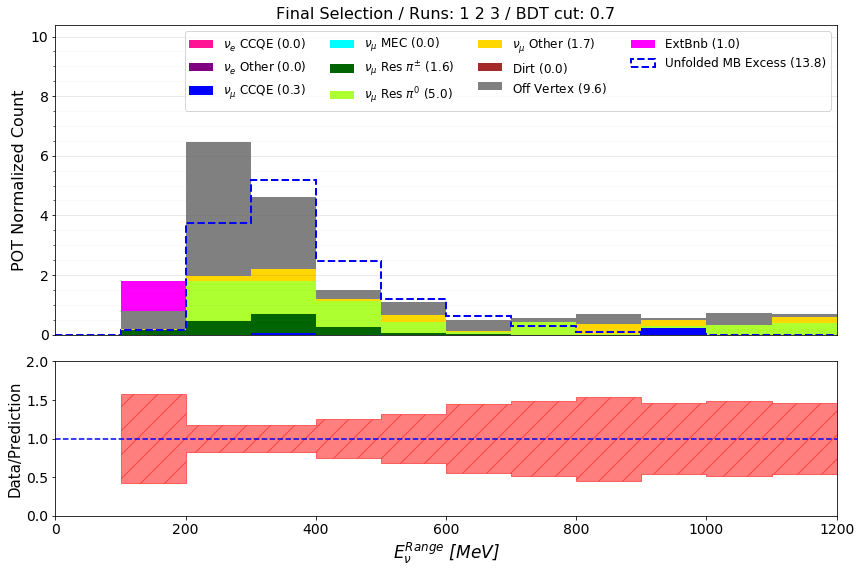

<Figure size 432x288 with 0 Axes>

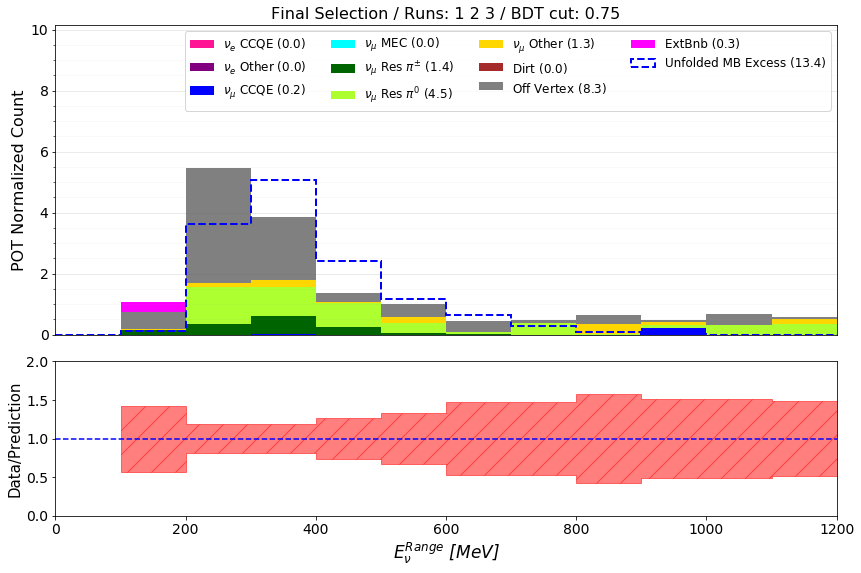

<Figure size 432x288 with 0 Axes>

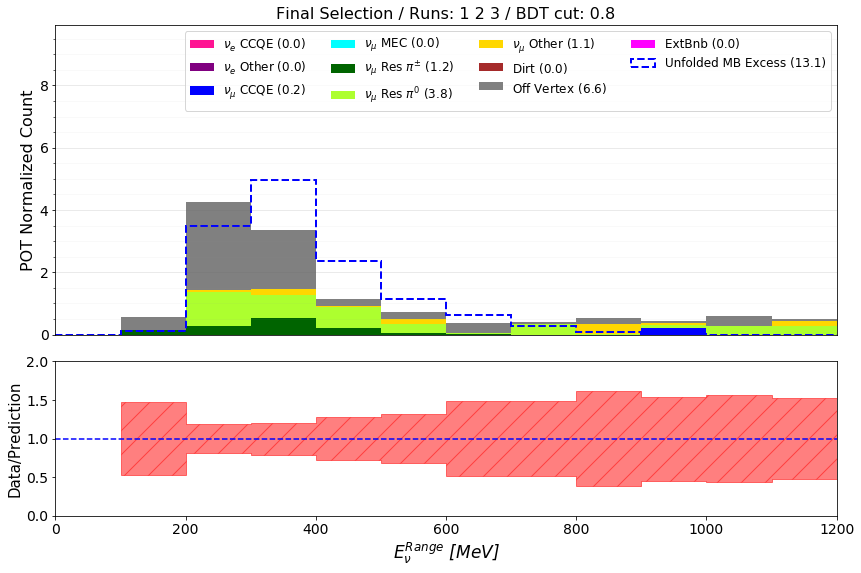

<Figure size 432x288 with 0 Axes>

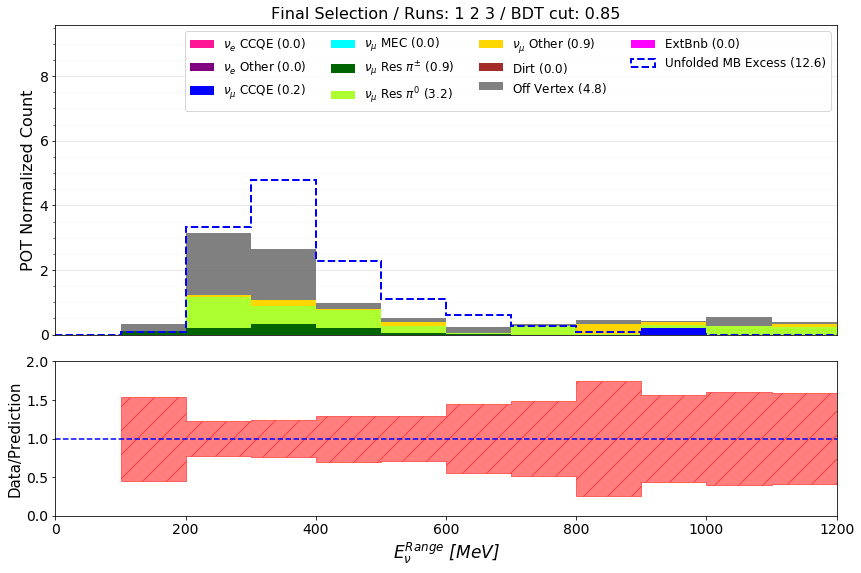

<Figure size 432x288 with 0 Axes>

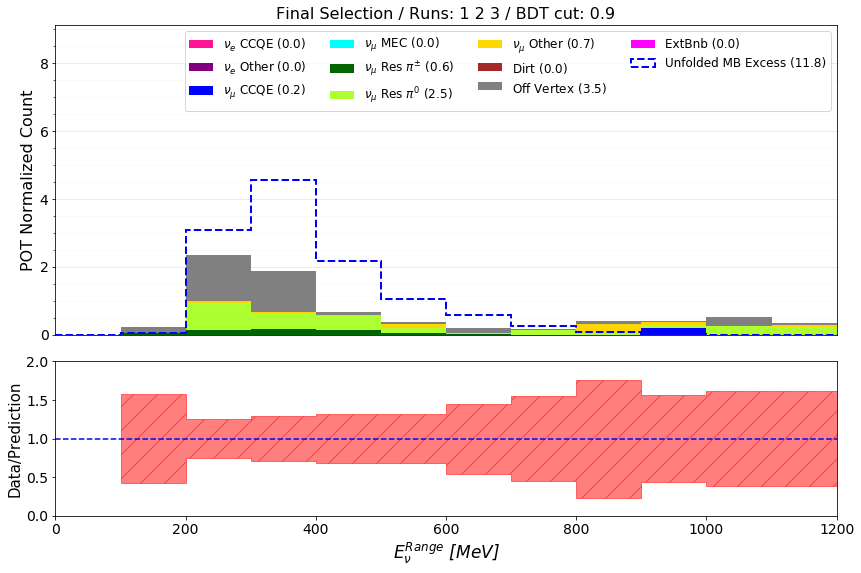

<Figure size 432x288 with 0 Axes>

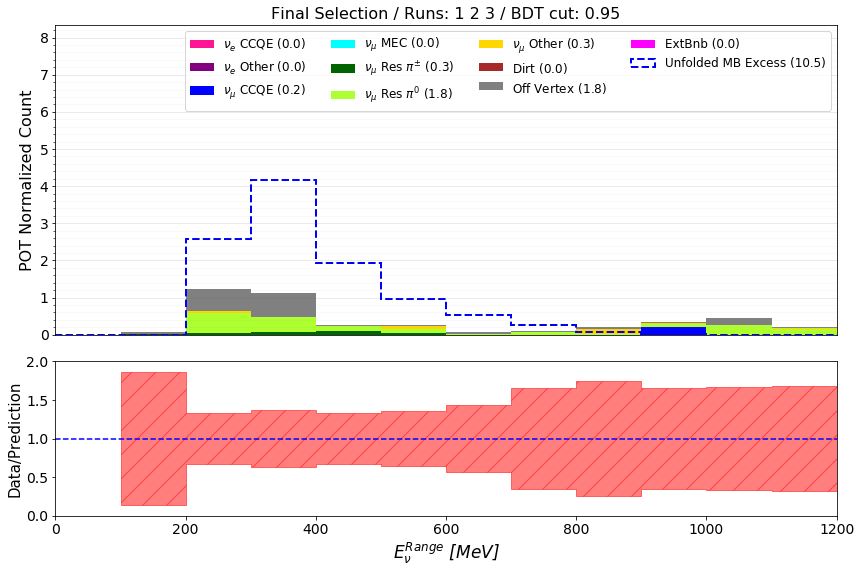

<Figure size 432x288 with 0 Axes>

In [49]:
fudge_nue = 0.0

verbose = False
sys     = False
bdtmode = 'fracweight'
nBDTs = 20
bdtpower = 0
bdtcutRange = [0.7,0.75,0.8,0.85,0.9,0.95]
runs_to_plot = [#[1],
                #[2],
                #[3],
                [1,2,3]]

POTdict = {1:{ft:DAT_POT1 for ft in filetaglist[1]},
           2:{ft:DAT_POT2 for ft in filetaglist[2]},
           3:{ft:DAT_POT3 for ft in filetaglist[3]}}
POTdict[3]['ext'] = DAT_POT2 + DAT_POT3


for varName in varb_names:


    
    if varName not in ['Enu_1e1p']: continue
    
        
    xlab = varlabel_dict[varName]
    
    low   = (range_dict[varName])[0]
    high  = (range_dict[varName])[1]
    
    if varName in ['Enu_1e1p']:
        xbin_edges = np.array([0,100,200,300,400,500,600,700,800,900,1000,1100,1200])
        bins = len(xbin_edges)-1
    else:
        bins = 10
        xbin_edges = np.linspace(low,high,bins+1)
    xbins = 0.5*(xbin_edges[1:] + xbin_edges[:-1])
    binwidts = xbin_edges[1:]-xbin_edges[:-1]
    binwid = xbin_edges[1]-xbin_edges[0]
    plotmult = binwid/binwidts
            
    
    
    
    
    for runs_included in runs_to_plot: # [run 1, run 2 run 3]
        
        for cut in bdtcutRange:

            if fset in range(1,6): plotTitle = 'Fake Dataset '+str(fset)+' / Runs:'
            elif cutMode==0: plotTitle = 'Final Selection / Runs:'
            elif cutMode==1: plotTitle = 'Loose Kinematic Cuts / Runs:'
            elif cutMode==2: plotTitle = 'High Energy Sideband / Runs:'
            elif cutMode==3: plotTitle = 'Low BDT Sideband / Runs:'
            plotFileName = varName
            FullPOT = 0
            POT1 = 0
            POT23 = 0

            vars_arr = []
            weights_arr = []
            labels_arr = []
            leew_arr = []

            for r in runs_included:
                plotTitle += ' %i'%r
                plotFileName += '_%i'%r
                FullPOT += POTdict[r]['overlay']
                if r == 1: POT1 += POTdict[r]['overlay']
                elif r in [2,3]: POT23 += POTdict[r]['overlay']

                for filetag in filetaglist[r]:
                    if not lowEpatch and 'lowE' in filetag: continue
                    dfc = df[r][filetag].copy()
                    MakeBDTcut(dfc,cut,bdtmode,nBDTs)

                    vars_arr += list(dfc[varName])
                    numu_l = np.core.defchararray.find(np.array(dfc['label'],dtype=np.string_),'numu')!=-1
                    labels = np.where(dfc['scedr']<vtxCut,dfc['label'],'offvtx')
                    labels_arr += list(labels)

                    weights = dfc['GenieWeight'] * dfc['POTweight']**(-1) * dfc['bdtweight'] * dfc['sigprob']**bdtpower
                    leeweights = dfc['LEEweight'] * weights

                    weights_arr += list(weights*POTdict[r][filetag])
                    leew_arr += list(leeweights*POTdict[r][filetag])

            datLab = "Data Sample "+str(fset)+" : {:.2e} POT".format(FullPOT)
            plotTitle += r' / BDT cut: '+str(cut)



            ## ------------------------ ##

            label_arr = np.array(labels_arr)
            var_arr = np.array(vars_arr)
            weight_arr = np.array(weights_arr)

            nueO = list(var_arr[label_arr=='nue_ccqe'])
            nue = list(var_arr[label_arr=='nue_other'])
            ccqe = list(var_arr[label_arr=='numu_ccqe'])
            mec = list(var_arr[label_arr=='numu_mec'])
            pipm = list(var_arr[label_arr=='numu_pipm'])
            pi0 = list(var_arr[label_arr=='numu_pi0'])
            other = list(var_arr[label_arr=='numu_other'])
            dirtVar = []
            offv = list(var_arr[label_arr=='offvtx'])
            extVar = list(var_arr[label_arr=='EXTBNB'])
            lee = list(var_arr)

            ovrw1 = list(weight_arr[label_arr=='numu_ccqe'])
            ovrw2 = list(weight_arr[label_arr=='numu_mec'])
            ovrw3 = list(weight_arr[label_arr=='numu_pipm'])
            ovrw4 = list(weight_arr[label_arr=='numu_pi0'])
            ovrw5 = list(weight_arr[label_arr=='numu_other'])
            ovrw6 = list(weight_arr[label_arr=='offvtx'])
            ovrw7 = list(fudge_nue*weight_arr[label_arr=='nue_other'])
            ovrw8 = list(fudge_nue*weight_arr[label_arr=='nue_ccqe'])
            dirtw = []
            extw = list(weight_arr[label_arr=='EXTBNB'])
            leew = leew_arr

            



            wghs = [[x for x in ovrw8],
                    [x for x in ovrw7],
                    [x for x in ovrw1],
                    [x for x in  ovrw2],
                    [x for x in ovrw3],
                    [x for x in  ovrw4],
                    [x for x in ovrw5],
                    [x for x in dirtw],
                    [x for x in ovrw6],
                    [x for x in extw],
                    [x for x in leew]]
            
            numw = [[1 if x > 0 else 0  for x in ovrw8],
                    [1 if x > 0 else 0 for x in ovrw7],
                    [1 if x > 0 else 0 for x in ovrw1],
                    [1 if x > 0 else 0 for x in  ovrw2],
                    [1 if x > 0 else 0 for x in ovrw3],
                    [1 if x > 0 else 0 for x in  ovrw4],
                    [1 if x > 0 else 0 for x in ovrw5],
                    [1 if x > 0 else 0 for x in dirtw],
                    [1 if x > 0 else 0 for x in ovrw6],
                    [1 if x > 0 else 0 for x in extw]]
            
            numlee = [1 if x > 0 else 0 for x in leew]

            mcErW = [[x**2 for x in ovrw8],
                     [x**2 for x in ovrw7],
                     [x**2 for x in ovrw1],
                     [x**2 for x in  ovrw2],
                     [x**2 for x in ovrw3],
                     [x**2 for x in  ovrw4],
                     [x**2 for x in ovrw5],
                     [x**2 for x in dirtw],
                     [x**2 for x in ovrw6],
                     [x**2 for x in extw],
                     [x**2 for x in leew]]



            rnum = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar],bins=xbin_edges,stacked='True',weights=numw,normed=0)
            rnumlee = plt.hist(lee,bins=xbin_edges,weights=numlee,normed=0)
            for i in range(len(rnum[0])): rnum[0][i]*=plotmult
            rnumlee = rnumlee[0]*plotmult
            plt.clf()

            r = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar,lee],bins=xbin_edges,stacked='True',normed=0,weights=mcErW)
            nueO_mcErr  = [sqrt(r[0][0][i]- 0) for i in range(bins)]
            nue_mcErr   = [sqrt(r[0][1][i]-r[0][0][i]) for i in range(bins)]
            ccqe_mcErr  = [sqrt(r[0][2][i]-r[0][1][i]) for i in range(bins)]
            mec_mcErr   = [sqrt(r[0][3][i]-r[0][2][i]) for i in range(bins)]
            pipm_mcErr  = [sqrt(r[0][4][i]-r[0][3][i]) for i in range(bins)]
            pi0_mcErr   = [sqrt(r[0][5][i]-r[0][4][i]) for i in range(bins)]
            other_mcErr = [sqrt(r[0][6][i]-r[0][5][i]) for i in range(bins)]
            dirt_mcErr  = [sqrt(r[0][7][i]-r[0][6][i]) for i in range(bins)]
            offv_mcErr  = [sqrt(r[0][8][i]-r[0][7][i]) for i in range(bins)]
            ext_mcErr   = [sqrt(r[0][9][i]-r[0][8][i]) for i in range(bins)]
            lee_mcErr   = np.array([sqrt(r[0][10][i]-r[0][9][i]) for i in range(bins)])
            
            stkerr =  [sqrt( 
                       nueO_mcErr[i]**2  + 
                       nue_mcErr[i]**2  + 
                       ccqe_mcErr[i]**2  + 
                       mec_mcErr[i]**2  + 
                       pipm_mcErr[i]**2  + 
                       pi0_mcErr[i]**2  + 
                       other_mcErr[i]**2  + 
                       dirt_mcErr[i]**2 + 
                       offv_mcErr[i]**2 +  
                       ext_mcErr[i]**2 )
                       for i in range(bins) 
                      ]
            stkerr = np.array(stkerr)

            plt.clf()

            pli = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar,lee],bins=xbin_edges,weights=wghs,stacked='True',normed=0)
            for i in range(len(pli[0])): pli[0][i]*=plotmult
            plt.clf()

            nums = [sum(x for x in pli[0][0]           ),
                    sum(x for x in pli[0][1] -pli[0][0]),
                    sum(x for x in pli[0][2] -pli[0][1]),
                    sum(x for x in pli[0][3] -pli[0][2]),
                    sum(x for x in pli[0][4] -pli[0][3]),
                    sum(x for x in pli[0][5] -pli[0][4]),
                    sum(x for x in pli[0][6] -pli[0][5]),
                    sum(x for x in pli[0][7] -pli[0][6]),
                    sum(x for x in pli[0][8] -pli[0][7]),
                    sum(x for x in pli[0][9] -pli[0][8]),        
                    sum(x for x in pli[0][10]-pli[0][9])
                    ]


            cls  = ['deeppink','purple','blue','cyan','darkgreen','greenyellow','gold','brown','gray','fuchsia']
            labs = [r'$\nu_e^{ }$ CCQE (%.1f)'%nums[0],
                    r'$\nu_e^{ }$ Other (%.1f)'%nums[1],
                    r"$\nu_\mu^{ }$ CCQE (%.1f)"%nums[2],
                    r"$\nu_\mu$ MEC (%.1f)"%nums[3],
                    r"$\nu_\mu$ Res $\pi^{\pm}$ (%.1f)"%nums[4],
                    r"$\nu_\mu$ Res $\pi^0$ (%.1f)"%nums[5],
                    r"$\nu_\mu^{ }$ Other (%.1f)"%nums[6],
                    r"Dirt$_{ }^{ }$ (%.1f)"%nums[7],
                    r"Off Vertex$_{ }^{ }$ (%.1f)"%nums[8],
                    "ExtBnb (%.1f)"%nums[9]]

            ## ----------------------- ##


            fig, ax = plt.subplots(figsize=(14,9.5))
            plt.subplot2grid((100,100),(0,0),colspan=100,rowspan=60)

            p = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar],bins=xbin_edges,weights=wghs[0:-1],stacked='True',color=cls,label=labs,normed=0)
            for i in range(len(p[0])): p[0][i]*=plotmult
            pl = plt.hist(lee,bins=xbin_edges,weights=leew,stacked='False',histtype='step',lw=2,color='blue',ls='--',label="Unfolded MB Excess (%.1f)"%nums[10])
            pl = pl[0]*plotmult
            ylow  = 0
            yhigh = max(2*pl)
            #yhigh = 1*len(runs_included)
            plt.title(plotTitle,fontsize=16)

            major_xticks = arange(low, high*1.01, 20)
            minor_xticks = arange(low, high*1.01, 5)
            major_yticks = arange(ylow, yhigh+1, 50)
            minor_yticks = arange(ylow, yhigh+1, 10)




            if(sys):
                rwt_sys_m,det_sys_m = getSysErrors(bins,varName,POT1,POT23)
                sys_label = 'Full Systematics + MC Stat'
            else:
                rwt_sys_m = np.zeros((bins,bins))
                det_sys_m = np.zeros((bins,bins))
                sys_label = 'MC Stat'
            rwt_sys = np.array([rwt_sys_m[j][j] for j in range(bins)])
            det_sys = np.array([det_sys_m[j][j] for j in range(bins)])
            sys_errs = np.sqrt(rwt_sys + det_sys + stkerr**2/p[0][-1]**2)
            
            k = tuple((varName,cut,nBDTs,bdtmode))
            staterror['bkg'][k] = stkerr
            prediction['bkg'][k] = p[0][-1]
            weightsdict['bkg'][k] = ovrw1 + ovrw2 + ovrw3 + ovrw4 + ovrw5 + ovrw6 + extw
            numbkgevents['bkg'][k] = rnum[0][-1]
            staterror['lee'][k] = lee_mcErr
            prediction['lee'][k] = pl
            weightsdict['lee'][k] = leew
            numbkgevents['lee'][k] = rnumlee

            sys_low = np.append((p[0][-1] * (1 - sys_errs)),0)
            rsys_low = np.append(1-sys_errs,0)
            sys_high = np.append((p[0][-1] * (1 + sys_errs)),0)
            rsys_high = np.append(1+sys_errs,0)
            #plt.fill_between(xbin_edges,sys_low,sys_low,step='post',hatch='/',label=sys_label,color='red',edgecolor='black',alpha=0.5)


            plt.legend(loc='upper right',fontsize=12,ncol=4)
            plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.17)
            plt.minorticks_on()
            plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.07)
            plt.yticks(fontsize=14)
            ax.set_yticks(major_yticks)
            ax.set_yticks(minor_yticks,minor=True)
            plt.xticks([])
            plt.ylim((ylow,yhigh))
            plt.xlim((low,high))
            #plt.semilogy()
            plt.ylabel("POT Normalized Count",fontsize=16)

            plt.subplot2grid((100,100),(65,0),colspan=100,rowspan=30)

            plt.fill_between(xbin_edges,rsys_low,rsys_high,step='post',hatch='/',label=sys_label,color='red',edgecolor='black',alpha=0.5)
            plt.axhline(y=1.0,ls='--',color='blue')
            plt.xlabel(xlab,fontsize=17,style='italic')
            plt.ylabel("Data/Prediction",fontsize=15)
            plt.ylim((0,2))
            plt.xlim((low,high))
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            ax.set_xticks(major_xticks)
            ax.set_xticks(minor_xticks,minor=True)

            #plt.savefig('/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/Plots/'+tag+'/'+plotFileName+'_cutLevel'+str(cut)+'.png')
            plt.show()
            plt.clf()

In [62]:
# Perform Background Fit
from lmfit import minimize, Parameters, report_fit

def fitfunc(x, m, cen, s, bwd):
    # basic landau + line
    bwp = x[1]-x[0] # assuming uniform binning
    xp = (x - cen)/s
    #xp2 = (x-cen2)/s2
    pdf = np.exp(-0.5*(xp + np.exp(-xp))) + m*x
    #pdf = np.exp(-0.5*(xp + np.exp(-xp))) + m*np.exp(-xp2**2)
    #pdf = np.exp(-xp**2) + m*x 
    #pdf = np.exp(-xp**2) + m*np.exp(-xp2**2)
    return  pdf / (bwp/bwd*sum(pdf))

def fitfunc_dataset(params, i, x, N, bwd):
    # calc fitfunc from params for data set i
    # using simple, hardwired naming convention
    cen  = params['cen'].value
    s    = params['s'].value
    m    = params['m'].value
    try:
        Np   = params['N%i'%i].value
    except:
        Np   = params['N0'].value
    
    return Np*fitfunc(x, m, cen, s, bwd)

def objective(params, xarr, data, errs):
    # calculate total residual for fits to several data sets held
    # in a 2-D array, and modeled by Gaussian functions
    ndata = len(data)
    resid = np.empty(0)
    # make residual per data set
    for i in range(ndata):
        d = data[i]
        e = errs[i]
        x = xarr[i]
        N = sum(d)
        bwd = x[1] - x[0]
        res = np.array((d - fitfunc_dataset(params, i, x, N, bwd)) / e)
        #print(d)
        #print(fitfunc_dataset(params, i, x, N, bwd))
        resid = np.concatenate((resid,res))
    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

def fit(mode,cutrange):

    # get all datasets and errors
    data = []
    errs = []
    xarr = []
    
    for cut in cutrange:
        k = tuple(('Enu_1e1p',cut,nBDTs,bdtmode))
        dat = prediction[mode][k]
        err = staterror[mode][k]
        nbkg = numbkgevents[mode][k]
        filtr = np.logical_and(np.logical_not(np.isnan(err)),err!=0)
        filtr = np.logical_and(filtr,nbkg>=9)
        if mode=='lee':
            filtr = np.logical_and(filtr,xbins<=800)
        dat = dat[filtr]
        x = np.array(xbins)[filtr]
        err = err[filtr]
        data.append(dat)
        errs.append(err)
        xarr.append(x)


    # create parameters for datasets
    fit_params = Parameters()

    fit_params.add( 'm', value=1e-5, min=0, max=1)
    fit_params.add( 'cen', value=200, min=0,  max=500)
    fit_params.add( 's', value=100, min=0.0, max=200.0)
    for i in range(len(cutrange)):
        fit_params.add( 'N%i'%i, value=10, min=0.0, max=50)

    # run the global fit to all the data sets
    result = minimize(objective, fit_params, args=(xarr, data, errs))
    report_fit(result)
    return result

strategy = 'ScaledFit'
refcut = 0.7
if strategy =='ScaledFit': 
    cutrange = [refcut]
elif strategy == 'FullFit':
    cutrange = bdtcutRange
else:
    print('Pick a valid strat!')
    exit(0)

print('\n##### Fitting LEE #####\n')
leeresult = fit('lee',cutrange)
print('\n##### Fitting BKG #####\n')
bkgresult = fit('bkg',cutrange)



##### Fitting LEE #####

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 7
    # variables        = 4
    chi-square         = 8.21908432
    reduced chi-square = 2.73969477
    Akaike info crit   = 9.12384060
    Bayesian info crit = 8.90748119
[[Variables]]
    m:    5.7887e-06 +/- 9.0544e-06 (156.41%) (init = 1e-05)
    cen:  304.201518 +/- 6.70650019 (2.20%) (init = 200)
    s:    64.5236334 +/- 3.81794967 (5.92%) (init = 100)
    N0:   13.3917814 +/- 0.80449878 (6.01%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, s)    = -0.796
    C(cen, N0) = -0.613
    C(s, N0)   = -0.463
    C(m, cen)  = -0.272
    C(cen, s)  =  0.211
    C(m, N0)   =  0.196

##### Fitting BKG #####

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 42
    # data points      = 11
    # variables        = 4
    chi-square         = 2.28038768
    reduced chi-square = 0.32576967
    Akaike info cri

[Errno 17] File exists: 'BackgroundFitterOutput/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/'
[Errno 17] File exists: 'BackgroundFitterOutput/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ScaledFit/'
0.14881577005948274
0.11626191989115622
5.3815824191063815
0.07044583046985461
0.030114882546317407
4.322852005591299
1.0024077896066383e-05


/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:129: RuntimeWarning: invalid value encountered in divide


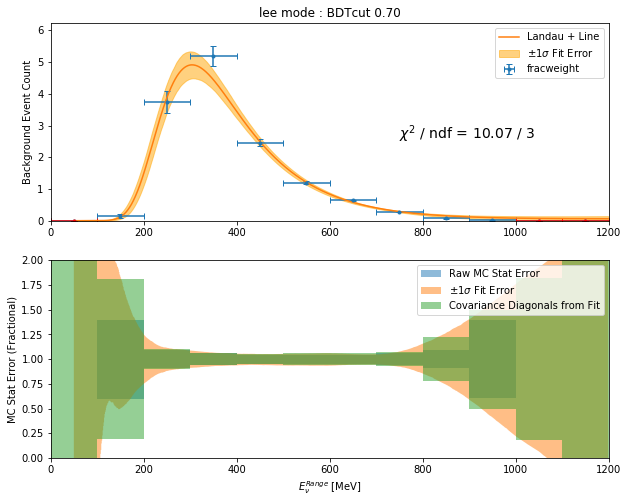

0.021867883300178297
0.11297106991674788
0.8328897134508925
0.4055006141768406
0.2918496679155947
0.3715563697537814
0.0022572169287946955
0.16246112513157066
0.0014420768346816394
0.07484297238504813
0.0030516312110741408


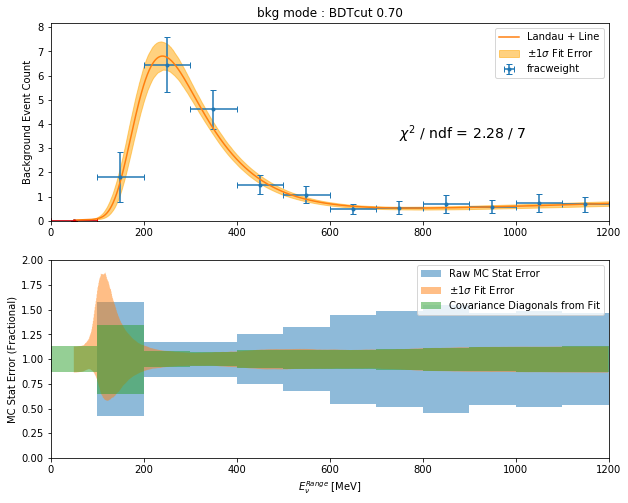

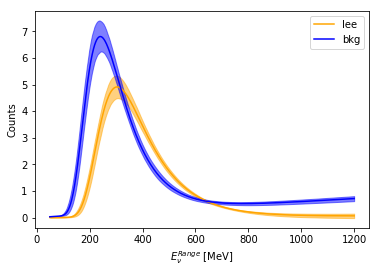

0.04297342331192257
0.17138531333206095
5.359764651202068
0.026581416951499463
0.0011291929313912274
4.893022762493742
0.07334995359505828


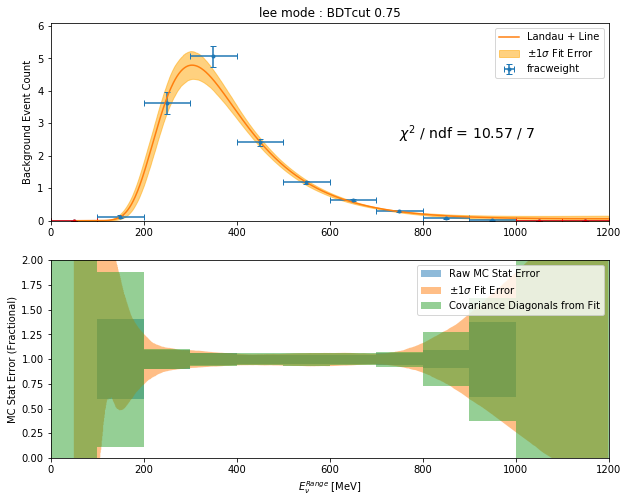

0.5029290756234587
0.07191995493188658
0.7212414256175608
0.07696354436218449
0.5653897432742495
0.06208241817232216
0.03058210628054115
0.249693311994967
0.0002626739894501538
0.171214890153627
0.000557224161404503


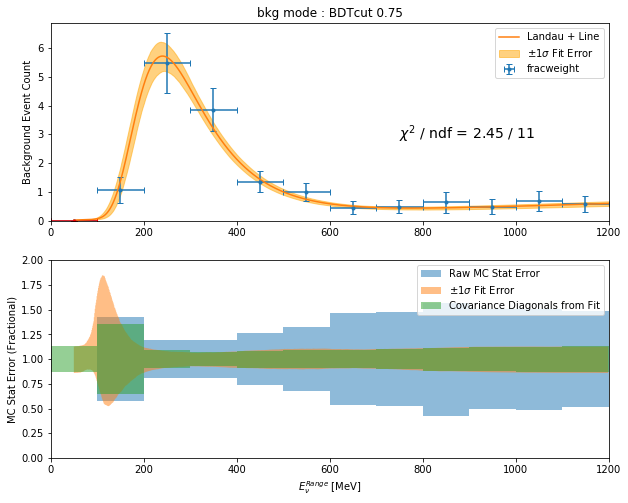

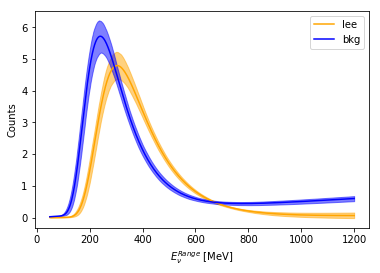

0.007218994920365604
0.27469154009875957
5.6312817612730095
0.005801407967503472
0.0007806532117565735
5.647603966898998
0.27872586975718366


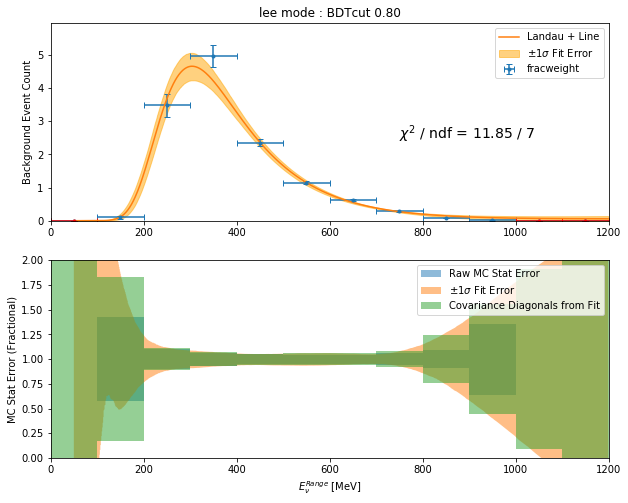

4.0433010655132176
0.1875974479203262
1.1630455676086036
0.00578063887414211
0.2892683163849144
0.03605690676024673
0.025232887173285555
0.27666045118502886
0.042263450725033645
0.24534264571408057
0.028316372542004295


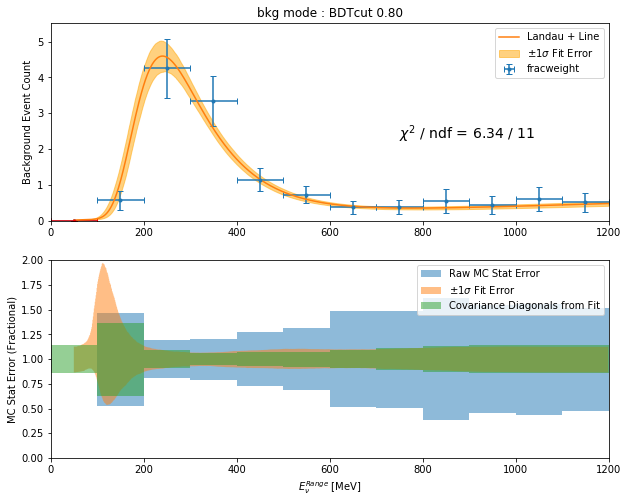

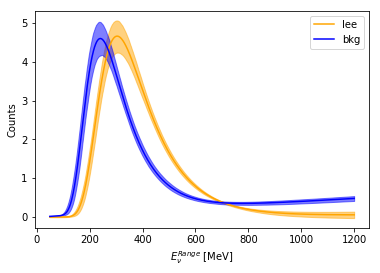

1.1516581196033977
0.2831803277138966
5.509810628270426
0.003516542537988045
9.54516620239899e-07
6.579319416035122
0.6675215147483746


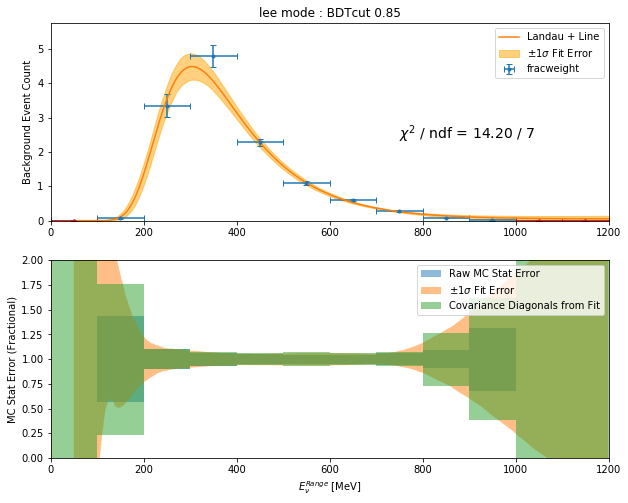

0.3850033923535412
0.998182448275621
0.05810068981385069
0.08941893435163005
0.45148558694020935
0.09469288409030505
0.22652690296032307
0.2716535858993502
0.4151325076322518
0.0226920482273226


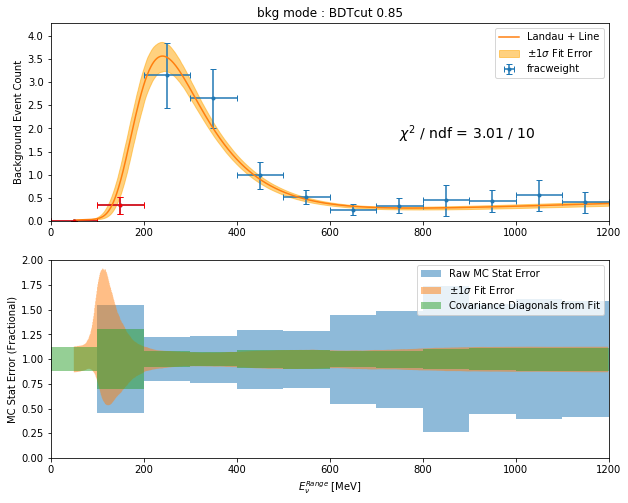

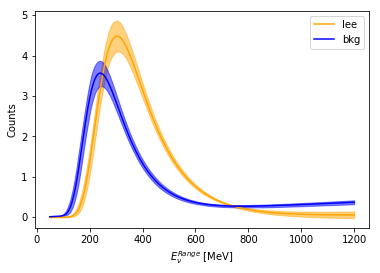

11.069592531562861
0.4861290441886993
5.755758558506852
0.027528310319393557
0.05130528167240468
7.918754887149266
1.5365207019103495


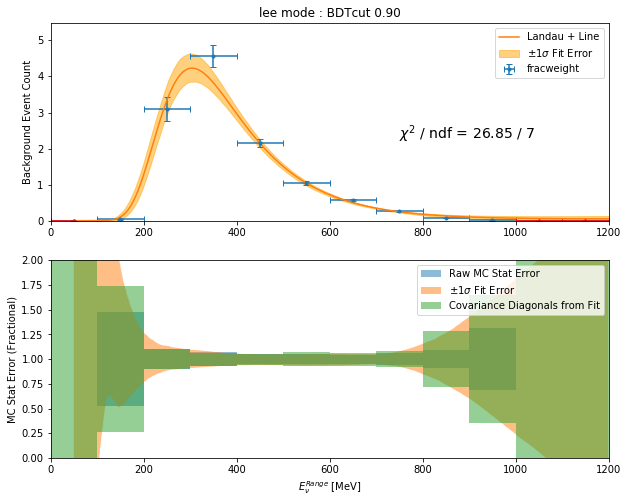

0.31345718865049066
0.45232257479402793
1.5375468252068692e-05
0.01254457927833172
0.25080053823341436
0.34514342452881436
0.3576320208831478
0.5989006627753489
0.6887019466845008
0.10471264692479648


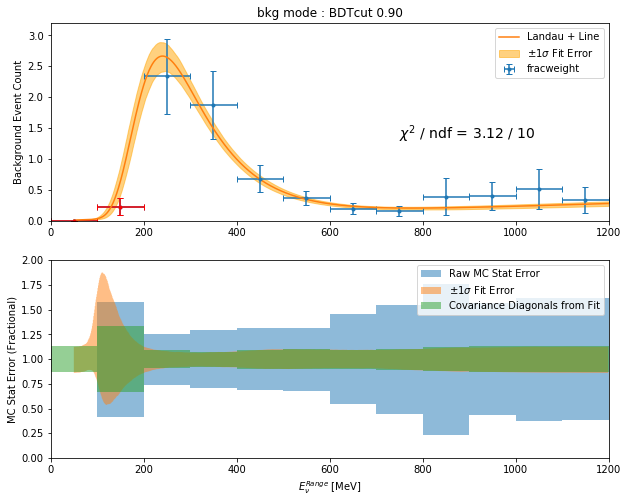

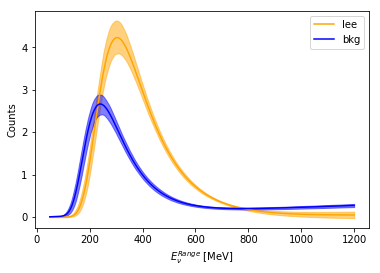

1.4940747131068841
7.049990111271116
0.05889199231650717
0.42551020374588716
10.00769192857457
3.959870033321782


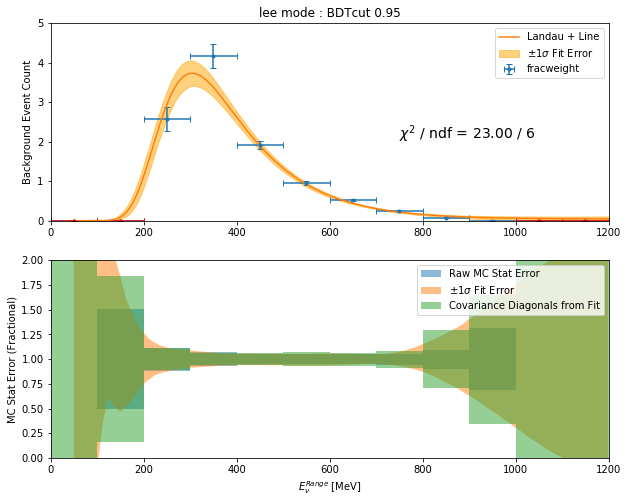

0.6009111055500258
0.37188907807575217
1.8032368542095423
0.3413245959212807
3.690385828412881
0.2694987586262172
0.26827770830600167
0.8531831561591044
1.046835139289139
0.15191062024631494


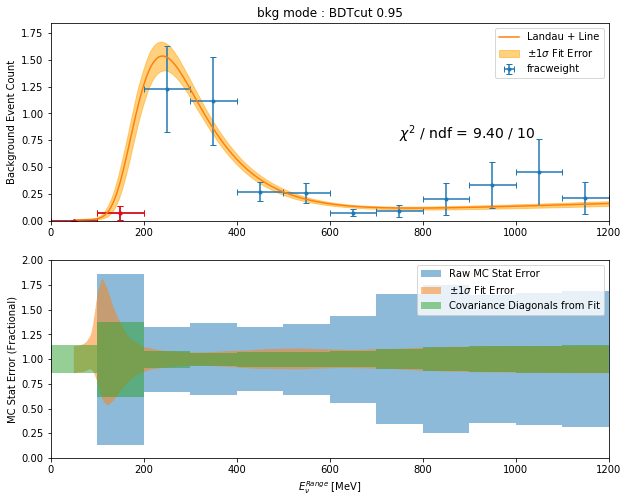

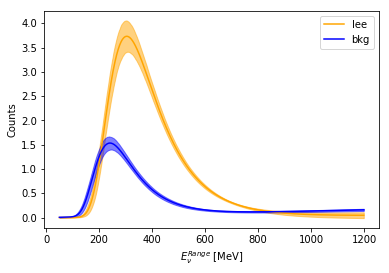

In [63]:
import scipy

def getCholEnvelope(ip,p,fitresult,pred,xfit,binwid,scale, M=1000):
    L = scipy.linalg.cholesky(fitresult.covar,lower=True)
    parvals = []
    parerrs = []
    for key in fitresult.params.valuesdict().keys():
        par = fitresult.params[key]
        parvals.append(par.value)
        parerrs.append(par.stderr)
    Zarr = np.transpose(np.vstack([np.random.normal(loc=0, scale=1, size=M)
                   for mean, sd in zip(parvals, parerrs)]))
    plist = []
    for Z in Zarr:
        pparvals = np.dot(L,Z) + parvals
        params = Parameters()
        for i,key in enumerate(fitresult.params.valuesdict().keys()):
            params.add(key,pparvals[i])
        pprime = scale*fitfunc_dataset(params, ip, xfit, sum(pred), binwid)
        plist.append(pprime)
    parr = np.sort(np.transpose(np.array(plist)))
    lowindex = int(M * (0.5 - 0.68/2))
    highindex = int(M * (0.5 + 0.68/2))
    plow = parr[:,lowindex]
    phigh = parr[:,highindex]
    return plow,phigh

def getCholCovar(ip,p,fitresult,pred,xfit,binwid,scale, M=100):
    L = scipy.linalg.cholesky(fitresult.covar,lower=True)
    parvals = []
    parerrs = []
    for key in fitresult.params.valuesdict().keys():
        par = fitresult.params[key]
        parvals.append(par.value)
        parerrs.append(par.stderr)
    Zarr = np.transpose(np.vstack([np.random.normal(loc=0, scale=1, size=M)
                   for mean, sd in zip(parvals, parerrs)]))
    cov_matrix = np.zeros((len(p),len(p)))
    for Z in Zarr:
        pparvals = np.dot(L,Z) + parvals
        params = Parameters()
        for i,key in enumerate(fitresult.params.valuesdict().keys()):
            params.add(key,pparvals[i])
        pprime = scale*fitfunc_dataset(params, ip, xfit, sum(pred), binwid)
        delta = pprime - p
        cov_matrix += np.outer(delta,delta) / M
    return cov_matrix
        
        

def getAvgFracEnv(fracEnv,xfit):
    binc = 1
    s,c = 0,0
    retarr = np.zeros(len(xbin_edges-1))
    for f,x in zip(fracEnv,xfit):
        if x > xbin_edges[binc]:
            retarr[binc-1] = s/c
            s,c = 0,0
            binc+=1
        s+=f
        c+=1
    return retarr

def printPred(xb,p,cov,savedir,stag):
    fout = open(savedir+stag+'_prediction.txt','w')
    for _ in xb: print(_,end=' ',file=fout)
    print('',file=fout)
    for _ in p: print(_,end=' ',file=fout)
    fout.close()
    fout = open(savedir+stag+'_cov.txt','w')
    N = len(cov)
    for i in range(N):
        for j in range(N):
            print(cov[i,j],end=' ',file=fout)
        print('',file=fout)
    fout.close()
    
    
savedir = 'BackgroundFitterOutput/'+tag+'/'
try: os.mkdir(savedir)
except OSError as error: print(error)
savedir = 'BackgroundFitterOutput/'+tag+'/'+strategy+'/'
try: os.mkdir(savedir)
except OSError as error: print(error)
    
xfit = np.arange(50,1200,1)
for i,cut in enumerate(bdtcutRange):
    pdict = {}
    plowdict = {}
    phighdict = {}
    for mode,result in zip(['lee','bkg'],[leeresult,bkgresult]):
        fig, ax = plt.subplots(2,figsize=(10,8))
        for bmode in [bdtmode]:
            k = tuple(('Enu_1e1p',cut,nBDTs,bmode))
            kRef = tuple(('Enu_1e1p',refcut,nBDTs,bmode))
            scale = sum(prediction[mode][k]) / sum(prediction[mode][kRef]) if strategy == 'ScaledFit' else 1.0
            ax[0].errorbar(xbins,prediction[mode][k],xerr=binwidts/2,yerr=staterror[mode][k],label=bmode,fmt='.',capsize=3)
            xbinsunfit = np.array(xbins)[numbkgevents[mode][k]<9]
            binwidtsunfit = binwidts[numbkgevents[mode][k]<9]
            predunfit = prediction[mode][k][numbkgevents[mode][k]<9]
            staterrunfit = staterror[mode][k][numbkgevents[mode][k]<9]
            ax[0].errorbar(xbinsunfit,predunfit,xerr=binwidtsunfit/2,yerr=staterrunfit,fmt='.',capsize=3,color='r')
            p = scale*fitfunc_dataset(result.params, i, xfit, sum(prediction[mode][k]), xbins[1] - xbins[0])
            pdict[mode] = p
            pcov = scale*fitfunc_dataset(result.params, i, np.array(xbins), sum(prediction[mode][k]), xbins[1] - xbins[0])
            ax[0].plot(xfit,p,label='Landau + Line')
            ndf = 0
            csq = 0
            for x,d,f,e,n in zip(xbins,prediction[mode][k],pcov,staterror[mode][k],numbkgevents[mode][k]):
                if e>0 and n>=9:
                    if mode=='lee' and x>800: continue
                    print(((d - f)/e)**2)
                    csq += ((d - f)/e)**2
                    ndf += 1
            if cut in cutrange: 
                if strategy=='ScaledFit':
                    ndf -= len(result.params)
                elif strategy=='FullFit':
                    ndf -= len(result.params) - len(bdtcutRange) + 1

            plow,phigh = getCholEnvelope(i,p,result, prediction[mode][k], xfit, xbins[1] - xbins[0], scale)
            plowdict[mode] = plow
            phighdict[mode] = phigh
            cov = getCholCovar(i,pcov,result, prediction[mode][k], np.array(xbins), xbins[1] - xbins[0], scale)
            fracerrs = np.sqrt(np.diagonal(cov)) / pcov
            printPred(xbin_edges,pcov,cov,savedir,bmode+'_%2.2f'%cut)

            ax[0].fill_between(xfit,plow,phigh,color='orange',alpha=0.5,label=r'$\pm1\sigma$ Fit Error')
            ax[1].fill_between(xbin_edges,1-np.append(staterror[mode][k]/prediction[mode][k],0),1+np.append(staterror[mode][k]/prediction[mode][k],0),alpha=0.5,step='post',label='Raw MC Stat Error')
            ax[1].fill_between(xfit-(xfit[1]-xfit[0])/2,plow/p,phigh/p,alpha=0.5,step='post',label=r'$\pm1\sigma$ Fit Error')
            ax[1].fill_between(xbin_edges,np.append(1-fracerrs,0),np.append(1+fracerrs,0),alpha=0.5,step='post',label='Covariance Diagonals from Fit')
        for i in [0,1]: ax[i].set_xlim(xbins[0]-binwid/2,xbins[-1]+binwid/2)
        ax[0].legend(ncol=1)
        ax[1].legend()
        ax[0].set_title('%s mode : BDTcut %2.2f'%(mode,cut))
        ax[0].set_ylabel('Background Event Count')
        ax[1].set_ylabel('MC Stat Error (Fractional)')
        ax[1].set_xlabel(r'$E_\nu^{Range}$ [MeV]')
        ymax = max(max(prediction[mode][k]),max(p))
        ax[0].set_ylim(0,1.2*ymax)
        ax[0].text(xbins[-5],0.5*ymax,r'$\chi^2$ / ndf = %2.2f / %i'%(csq,ndf),fontsize=14)  
        ax[1].set_ylim(0,2)
        plt.show()
    
    for mode,color in zip(['lee','bkg'],['orange','blue']):
        plt.plot(xfit,pdict[mode],label=mode,color=color)
        plt.fill_between(xfit,plowdict[mode],phighdict[mode],alpha=0.5,color=color)
    plt.xlabel(r'$E_\nu^{Range}$ [MeV]')
    plt.ylabel('Counts')
    plt.legend()
    plt.show()
        
        